# prior imposed on SSFR from the Dirichlet prior

In [1]:
import os
import fsps
import zeus
import numpy as np 
import scipy.optimize as op

In [2]:
from provabgs import infer as Infer

In [3]:
# --- plotting --- 
import corner as DFM
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

sample SFH from Dirichlet prior and calculate average SFR over 1 Gyr

In [4]:
tlb = np.load('/Users/chahah/data/provabgs/prior_correct/t.lookback.npy')
nlb = len(tlb)
tage = tlb[-1]

tage_bins = np.array([0., 0.03, 0.1, 0.33, 1.1, 3.6, 11.7, tage+1e-5])
dtage = np.array([0.03, 0.07, 0.23, 0.77, 2.5, 8.1, tage-11.7])

def avgSFR(theta, dt=1.): 
    if dt == 1.: 
        return (np.sum(theta[:3]) + theta[3] * 0.67 / 0.77) / 1e9
    elif dt == 0.1: 
        return np.sum(theta[:2]) / (dt * 1e9)

## sample from Dirichlet prior

In [5]:
dirch = Infer.FlatDirichletPrior(7)

In [6]:
thetas = np.array([dirch.transform(dirch.sample()) for i in range(10000)])[:,::-1]

In [7]:
ssfrs_100myr = np.array([avgSFR(tt, dt=0.1) for tt in thetas])
ssfrs_1gyr = np.array([avgSFR(tt, dt=1.) for tt in thetas])

(-14.0, -8.0)

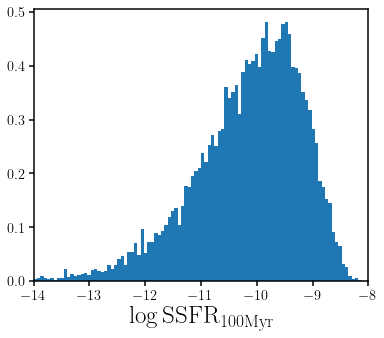

In [8]:
fig = plt.figure(figsize=(6,5))
sub = fig.add_subplot(111)
sub.hist(np.log10(ssfrs_100myr), density=True, range=(-14, -8), bins=100)
sub.set_xlabel(r'$\log {\rm SSFR}_{\rm 100 Myr}$', fontsize=25)
sub.set_xlim(-14, -8)

(-14.0, -9.0)

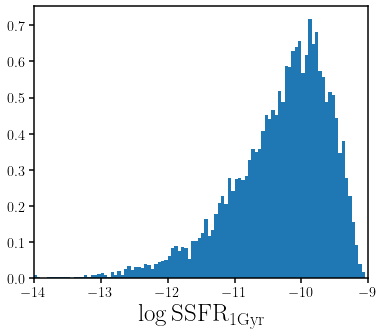

In [9]:
fig = plt.figure(figsize=(6,5))
sub = fig.add_subplot(111)
sub.hist(np.log10(ssfrs_1gyr), density=True, range=(-14, -9), bins=100)
sub.set_xlabel(r'$\log {\rm SSFR}_{\rm 1 Gyr}$', fontsize=25)
sub.set_xlim(-14, -9)